In [99]:
import spacy
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [101]:
nlp = spacy.load('de_core_news_md')

In [102]:
df = pd.read_csv('NLPGoogleReviewSummary/data/reviews.csv', sep=';')
df

,Unnamed: 0,caption,rating,timestamp
0,0,"Die mit Abstand leckerste Pizza in Deutschland, und das selbst wenn man sie um halb 10 abends zum mitnehmen bestellt :) Einfach zum niederknien! …",5.0,2023-02-15 22:10:07.146586
1,1,NaN,5.0,2023-02-15 00:10:07.146694
2,2,NaN,5.0,2023-02-15 00:10:07.146698
3,3,NaN,5.0,2023-02-14 00:10:07.146700
4,4,Good place to dine in! Sadly no chicken pizzas available. Do keep in mind the waiting time when you visit✌🏻 …,4.0,2023-02-14 00:10:07.146703
...,...,...,...,...
495,495,"Sehr gute Pizza, besonders die Nr. 9 sehr zu empfehlen . Netter und zuvorkommender Service bei vollem Haus. Hier werde ich öfters Pizza essen gehen ! …",5.0,2022-02-16 00:17:55.409988
496,496,"Sehr leckere Pizza, tolles Team. (Translated by Google) Very tasty pizza, great team.",4.0,2022-02-16 00:17:55.410018
497,497,"good dough, however, everything is a bit salty",5.0,2022-02-16 00:17:55.410048
498,498,"One of my favorite pizza place in town. Some may value it overpriced, some may complain the service. But their pizza just got me that I am willing to adjust, also lucky me that I always receive great …",5.0,2022-02-16 00:17:55.410078


In [103]:
# Remove NaN caption 
df = df.loc[~df['caption'].isnull(), ['caption', 'rating', 'timestamp']]
df.reset_index(drop=True)
df.head(3)

,caption,rating,timestamp
0,"Die mit Abstand leckerste Pizza in Deutschland, und das selbst wenn man sie um halb 10 abends zum mitnehmen bestellt :) Einfach zum niederknien! …",5.0,2023-02-15 22:10:07.146586
4,Good place to dine in! Sadly no chicken pizzas available. Do keep in mind the waiting time when you visit✌🏻 …,4.0,2023-02-14 00:10:07.146703
5,This is the must try pizza in Frankfurt.,5.0,2023-02-14 00:10:07.146705


In [104]:
# Remove the section translated by google if present
df['caption'] = df['caption'].str.split('(Translated by Google)').str[0]
df.head(3)

,caption,rating,timestamp
0,"Die mit Abstand leckerste Pizza in Deutschland, und das selbst wenn man sie um halb 10 abends zum mitnehmen bestellt :) Einfach zum niederknien! …",5.0,2023-02-15 22:10:07.146586
4,Good place to dine in! Sadly no chicken pizzas available. Do keep in mind the waiting time when you visit✌🏻 …,4.0,2023-02-14 00:10:07.146703
5,This is the must try pizza in Frankfurt.,5.0,2023-02-14 00:10:07.146705


In [105]:
# Caption to text. Joining all captions in a long text
full_caption_text = '. '.join(df['caption'])
len(full_caption_text)

33194

In [253]:
# Top used words based on arguments
def getWordFrequency(text, pos="NOUN", top_items=0):
    doc = nlp(text)
    words = [token.lemma_
                 for token in doc
                     if (not token.is_stop and not token.is_punct and (pos == "" or token.pos_ == pos))]
    word_freq = Counter(words)
    
    return(dict(word_freq.most_common(top_items) if top_items else word_freq.most_common()))

#### 

### Bewertungen pro Nummer

In [199]:
sns.set_theme()

<AxesSubplot: xlabel='rating', ylabel='count'>

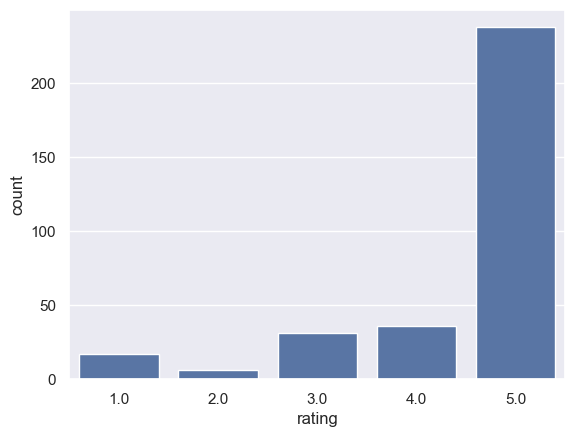

In [355]:
f, ax = plt.subplots(1,1)
ratings = df['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']
ratings = ratings.sort_values(by=['rating'], ascending=False)
#ratings
sns.barplot(ratings, x="rating", y='count', color='b', ax=ax)
#ax.set(xlabel='Bewertung', ylabel='Zahl')

### Meistverwendete Wörter

In [212]:
from wordcloud import WordCloud

In [255]:
freq = getWordFrequency(full_caption_text, "NOUN")

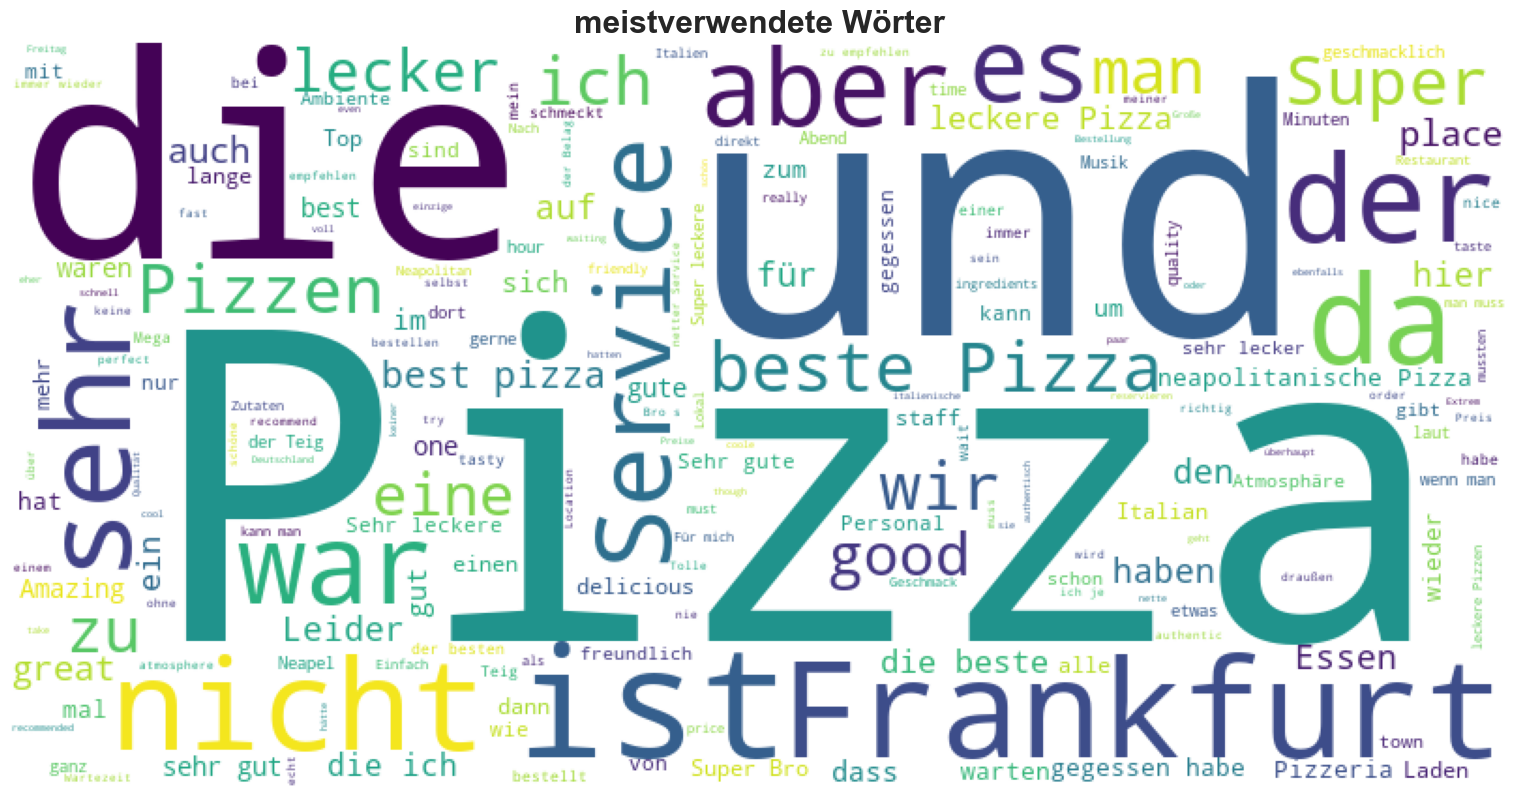

In [289]:
plt.figure(figsize=(15, 12), facecolor = None)
plt.imshow(WordCloud(width = 800, height = 400, 
                     background_color='white').generate( full_caption_text ))
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('meistverwendete Wörter', fontsize=23, fontweight='bold')
plt.show()

### Meistverwendete Nomen & Verben

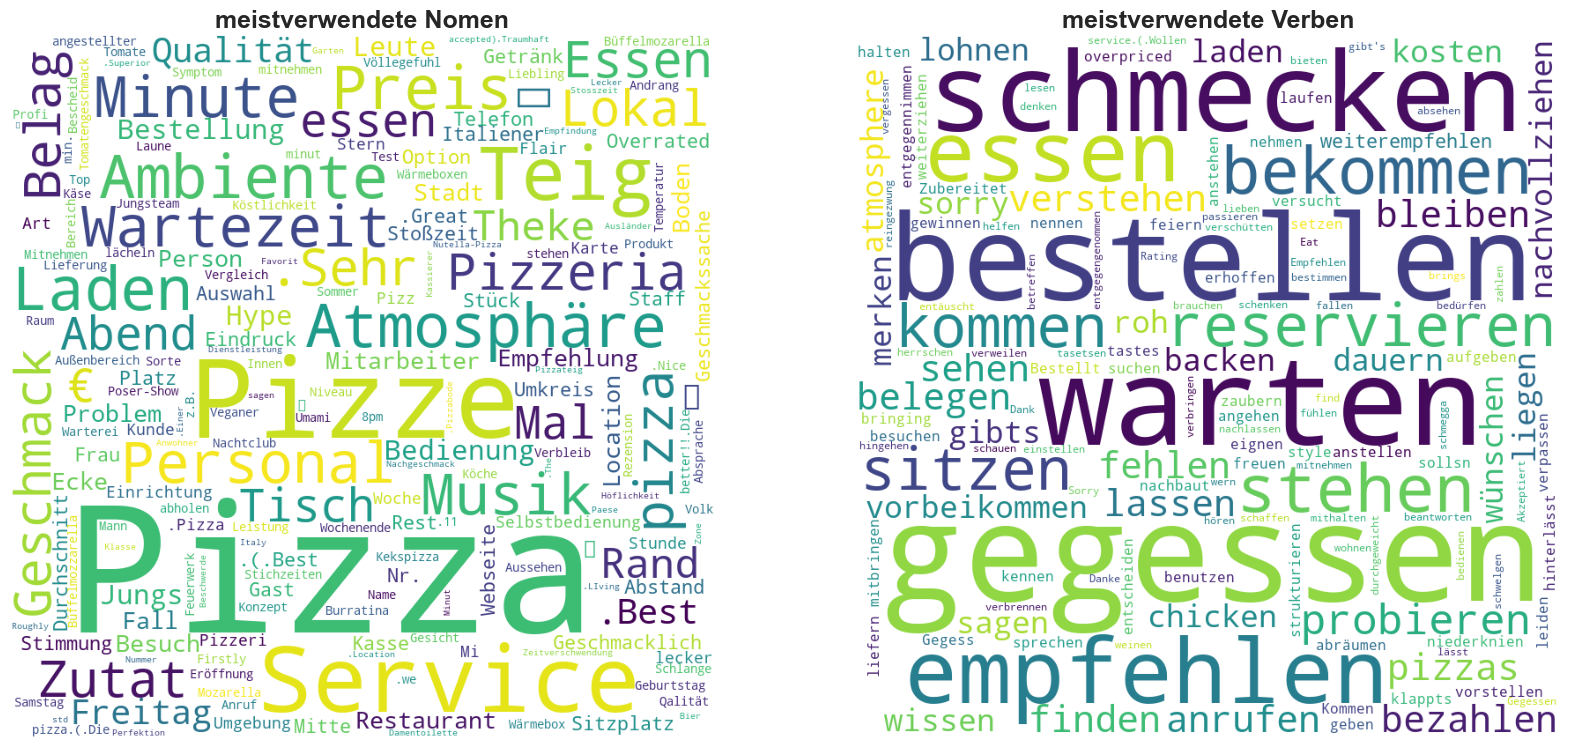

In [291]:
freqNoun = getWordFrequency(full_caption_text, "NOUN")
freqVerb = getWordFrequency(full_caption_text, "VERB")

freqs = [freqNoun, freqVerb]
titles = ['meistverwendete Nomen', 'meistverwendete Verben']

f, axes = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(20)
for i, ax in enumerate(axes):
    ax.imshow(WordCloud(width = 800, height = 800, 
                         background_color='white').generate_from_frequencies( freqs[i] ))
    ax.axis('off')
    ax.set_title(titles[i], fontsize=18, fontweight='bold')

### Meisteverwendete Verben pro Bewertung

In [326]:
full_caption_text_1 = '. '.join(df.loc[df['rating'] == 1]['caption'])
full_caption_text_2 = '. '.join(df.loc[df['rating'] == 2]['caption'])
full_caption_text_3 = '. '.join(df.loc[df['rating'] == 3]['caption'])
full_caption_text_4 = '. '.join(df.loc[df['rating'] == 4]['caption'])
full_caption_text_5 = '. '.join(df.loc[df['rating'] == 5]['caption'])

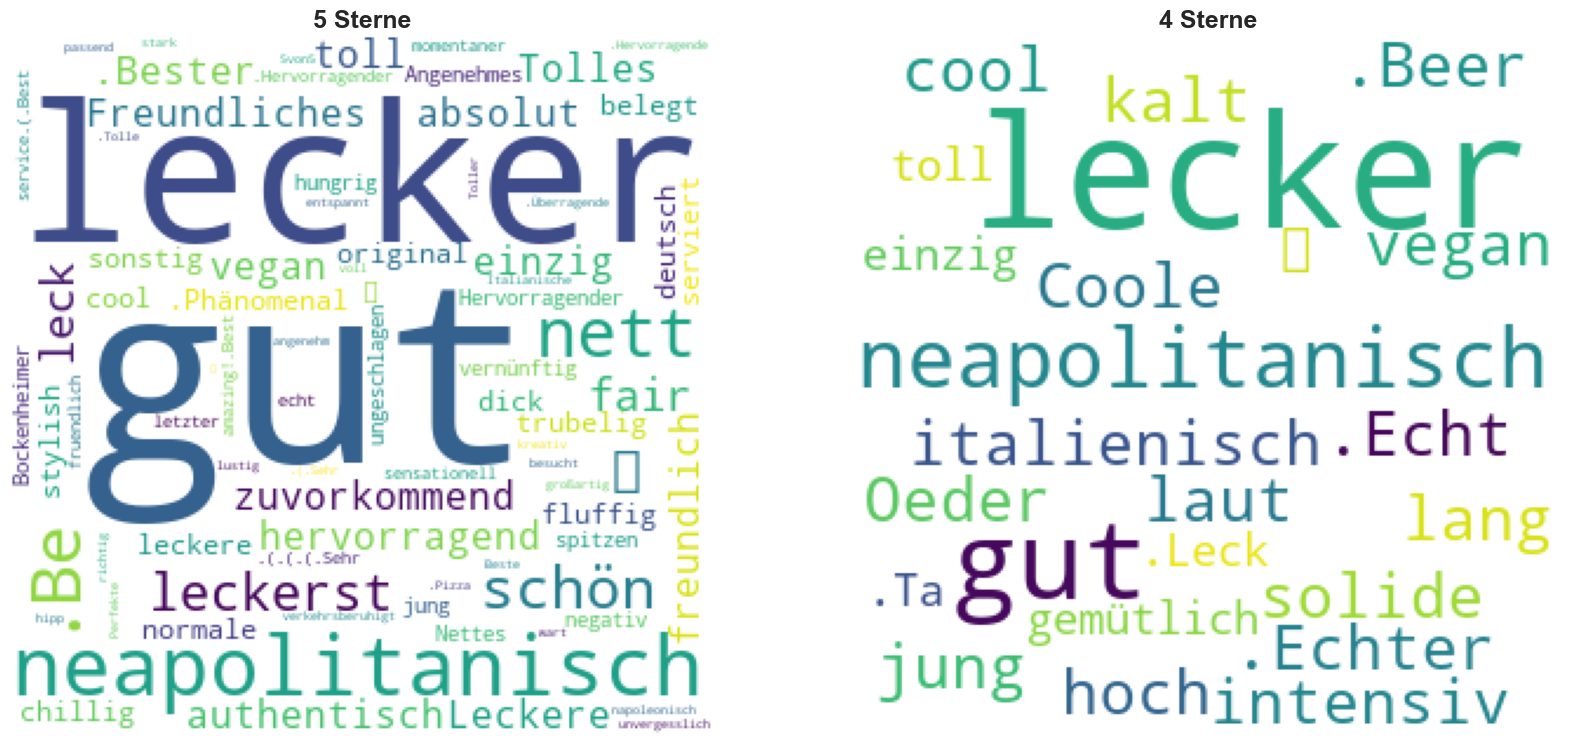

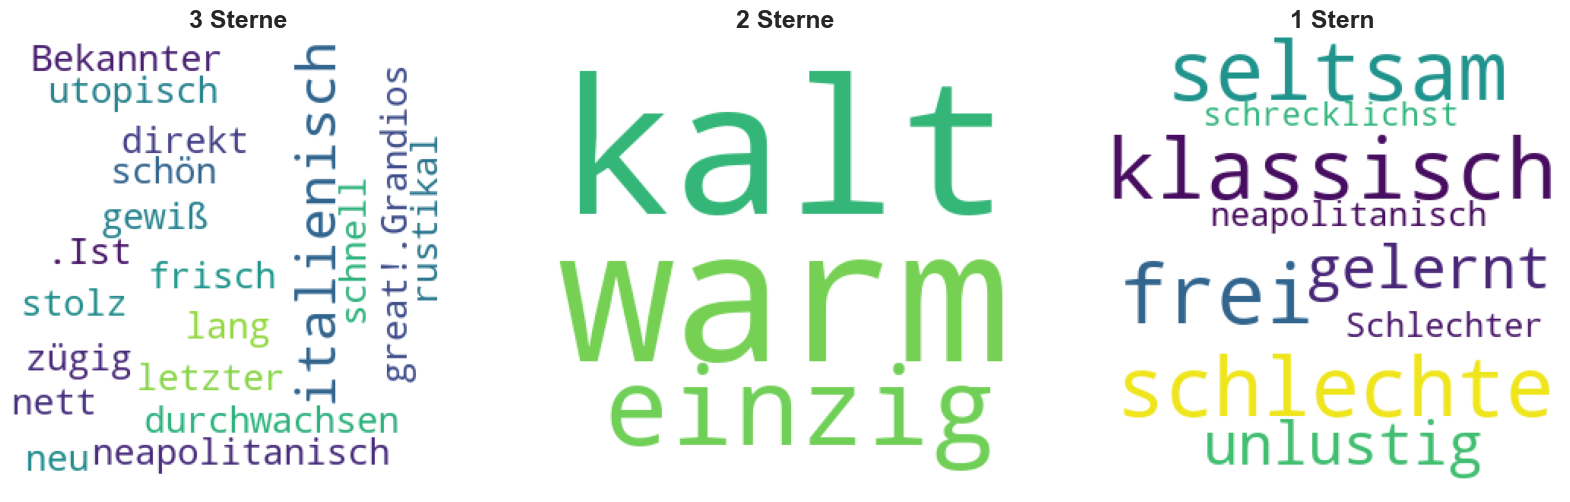

In [354]:
freqs1 = [ getWordFrequency(full_caption_text_5, "ADJ"),
          getWordFrequency(full_caption_text_4, "ADJ")]

freqs2 = [getWordFrequency(full_caption_text_3, "ADJ"),
          getWordFrequency(full_caption_text_2, "ADJ"),
          getWordFrequency(full_caption_text_1, "ADJ")]

titles1 = ['5 Sterne', '4 Sterne']
titles2 = ['3 Sterne', '2 Sterne', '1 Stern']

f1, axes1 = plt.subplots(1, 2)
f2, axes2 = plt.subplots(1, 3)

f1.set_figheight(15)
f1.set_figwidth(20)

f2.set_figheight(15)
f2.set_figwidth(20)

for i, ax in enumerate(axes1):
    ax.imshow(WordCloud(width = 300, height = 300, 
                         background_color='white').generate_from_frequencies( freqs1[i] ))
    ax.axis('off')
    ax.set_title(titles1[i], fontsize=18, fontweight='bold')

for i, ax in enumerate(axes2):
    ax.imshow(WordCloud(width = 300, height = 300, 
                         background_color='white').generate_from_frequencies( freqs2[i] ))
    ax.axis('off')
    ax.set_title(titles2[i], fontsize=18, fontweight='bold')